In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.objects as so
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = 'latin')
pkmn_color_type = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Seaborn Tutorial from DataCamp
## What is Seaborn
**Seaborn** is a data visualization tool built on top of _Matplotlib_. It very easy to use and can plot a wide array of differnt kinds of information. <br>
It has also been made to work well with Pandas which we use to keep track of and manipulate csv data sheets. <br>
Below is a short example showing that we can easily plot two variables in a _scatterplot_ with just 4 lines of code. 

We can also easily make a _count plot_ as shown below.

In [ ]:
height = [62, 64, 69, 75, 66, 68, 65, 71, 76, 73] # in inches
weight = [120, 136, 148, 175, 137, 165, 154, 172, 200, 187] # in pounds
gender = ["Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male"]

sns.scatterplot(x = height, y = weight)
plt.show()

sns.countplot(x = gender)
plt.show()

## Seaborn and Pandas
**<ins>Pandas</ins>** is:
* A Python library for data analysis
* Can easily read datasets from csv, txt, and many other document types.
* Supports _DataFrame_ objects

Just like with other uses, we need to read our file by loading the information into a DataFrame. <br>
To do this, we can use the following:

    df = pd.read_csv('filename.csv')
If we want to preview the information, we can use **head()** to give us the first 5 rows by default.

For practice, i've downloaded a sample csv file to practice on. It is called **mlb_players.csv**

In [ ]:
df = pd.read_csv('mlb_players.csv')
df.head()
df.columns = df.columns.str.strip()

sns.scatterplot(x = "Weight(lbs)", y = "Height(inches)", data = df)
plt.title("Weight compared to Height in MLB Players")
plt.show()



### Countplot using our DataFrame
In order to call the DataFrame for pandas and seaborn to use, we have to let python know which column to refer to.

    sns.countplot(x = "Team", data = df)

Seaborn works really well with Pandas DataFrames, but _ONLY_ when the data is tidy. <br>
**Tidy Data** means that each <ins>observation</ins> has its own row, and each <ins>variable</ins> has its own column.

In [ ]:
df = pd.read_csv('mlb_players.csv')
df.columns = df.columns.str.strip() # Removed excess spacing in the 'key' row



team_type = df.dtypes
print(team_type)
sns.countplot(x = "Team", data = df)
plt.show()
sns.countplot(x = "Position", data = df)
plt.show()

### Adding a Third Variable with _Hue_
**_Hue_** is used to visualize the data of different categories in one plot. <br>
We are using the built-in dataset "tips" to visualize data. In our example we are seeing that higher bills tend to yeild higher tips. But what if we wanted to see which of these tips were _smokers_ vs _non smokers_? <br>
**Seaborn** allows us to have one variable (_hue_) be displayed by color, and plotted on the same scatterplot. We will use

    hue = "variable"
Where we will place a column name in-place of "variable". **Seaborn** will automatically add a legend to the scatterplot. <br>
**NOTE**: This all goes inside of our plot parameters like in the following example. the order of these matters, and it must go 

    sns.scatterplot(x, y, data, hue, hue_order, palette)

To control the colors of our hue, we can create a dictionary that assigns a color to each value of "Yes" and "No".

In [ ]:
tips = sns.load_dataset("tips")     #A sample dataset provided by seaborn
hue_colors = {
    "Yes" : "green",
    "No" : "red"
}

sns.scatterplot(
    x = "total_bill",
    y = "tip",
    data = tips,
    hue = "smoker",
    palette = hue_colors
)

plt.show()

# Seaborn Tutorial from EliteDataScience
## Importing libraries and Datasets
We will be using the CSV file called 'Pokemon' which contains data about the stats for the first 151 Pokemon. When loading the information into a DataFrame, we have signified that the first column (the Pokemon's number) is used for ID purposes and can treated as such. We do that by passing the argument

    index_col = 0
We also included another argument to our DF which specifies the codec for the file. This is important because of the way that Python encodes and decodes information into/from byte format. Python uses ascii, which doesn't include a lot of common characters used in Pokemon names. <br>
We can specify that we are using a _latin_ based language to help support all the characters we need to understand our data.

    encoding = 'latin'
Note: The encoding was required to import the data into a DataFrame and not kickback an error.

In [ ]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = 'latin')
df.head()

## Seaborn Plotting Function
One of Seaborn's greatest strenths is its diversity of plotting functions. For instance, making a **scatter plot** is just one line of code using the  _lmplot()_ function. We will be using a DataFrame to take data from, rather than manually entering a series of data.<br>
Lets compare **Attack** and **Defense** stats using a scatterplot.
<br> <br>
**Note:** Seaborn doesn't actually have a basic scatterplot function. If we really want to do a basic scatterplot we can use MatPlotLib. This example uses Seaborn's function for fitting and plotting a regression line. We can edit down to match what we know to be a scatterplot.
* First, we can set **fit_reg = false** to remove the regression line.
* Second, we can set **hue = stage** to color our points by the Pokemon's evolution stage. <ins>**Hue**</ins> is extremely useful because it allows us to express a third dimenion of data using color.


In [ ]:
# Pulling data from our DataFrame
sns.lmplot(x = 'Attack', y = 'Defense', data=df,
           fit_reg = False, # Remove the regression line
           hue = 'Stage' #Color by evolution stage
           )
plt.show()

## Customizing with Matplotlib
Remember Seaborn is a high-level interface _to_ Matplotlib. Seaborn is very powerful and can do some spectacular graphing, but sometimes need to edit using matplotlib. For one, we will use it to control our axes limits. Here's our process:
1. Invoke the sns plotting as normal
2. Invoke Matplotlib's customization. In our case we will use **ylim()** and **xlim()** to control our axis limits. This information can be entered before we run _plt.show()_.

In [ ]:
sns.lmplot(x = 'Attack', y = 'Defense', data=df,
           fit_reg = False, # Remove the regression line
           hue = 'Stage' #Color by evolution stage
           )
plt.ylim(0, 200)
plt.xlim(0, 160)
plt.show()

## The role of Pandas
Pandas plays a very important role when useing Seaborn. Seaborn reads DataFrames very well. For example, lets make a **box plot** using our Pandas Dataframe. This boxplot will show the combat stats for our Pokemon. <br>
We will also make our plot bigger and more legible by using **plt.figure(figsize=())**

    plt.figure(figsize = (,))

In [ ]:
plt.figure(figsize = (9, 6))
sns.boxplot(data = df)

### Cleaning up our boxplot
This is a good start, but there are some columns we'd probably like to remove:
* We can remove the 'Total' since we have individual stats.
* We can remove the 'Stage' and 'Legendary' columns because they are not combat stats

There isn't a good way to do this by just using Seaborn, so we will format which data to add to our DataFrame ahead of time by using Pandas. <br>
We will now create a new DataFrame called **stats_df** that only includes our combat stats.

In [ ]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)
sns.boxplot(data = stats_df)

#### What does this graph tell us?
Our previous graph shows us the average value for each stat, along with its standard deviation from the mean. The dots represent some outliers in each category. From this we can infer that almost everything is between 0-150 for each of our columns, with HP, Defense, and Sp. Atk having outliers above 150.

## Seaborn Themes
A huge advantage of Seaborn is that it comes with decent styles baked in. Ther are five preset themes, and the default one is called _'Darkgrid'_. <br>
Let's try out the _'Whitegrid'_ theme while making a **violin plot**.
* Violin plots are a useful alternative to box plots.
* They show the distribution (through thickness of the violin) instead of only the summary statistics

For example, lets visualize the distribution of **Attack** by the Pokemons primary **Type**.

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6)) # Growing plot dimensions so we can read it better

sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

#### Understanding the Graph
From our graph, we can see that Dragon types can have _really_ high attack ,but also have some of the highest variance. Ghost type tends to not have much attack, but its variance is also quite low.

## Color Palettes
Seaborn allows us to set custom color palettes. We can simply create a _Python List_ thats ordered of color hex values taken from Bulbapedia. This will give us familiar colors for each type. We will use the **palette = ** argument to recolor our chart. Notice that the order of colors matches up with the order of our chart.

In [ ]:
pkmn_color_type = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6)) 
sns.violinplot(
    x = 'Type 1',
    y = 'Attack',
    data = df,
    palette = pkmn_color_type       #Apparently will be depreciated, but I don't understand how to fix
)   

### Swarm Plot
The violin plots are really good for visualizing distributions, however, since we only have 151 Pokemon in our dataset we may want to display each point. <br> That's where the **Swarm Plot** comes in. This visualization will show each point, while "stacking" those with similar values. The graph should look similar, but give us each data point rather than a shape.<br>
To call the **Swarm Plot** we can use the following line of code:

    sns.swarmplot(x=, y=, data=)
**IMPORTANT**: In future versions of Seaborn, the following changes will need to be made for readability:
1. **x**, **y**, and **palette** should be defined outside of the sns.plot
2. **hue** _must_ be defined alongside **palette**
3. inside of the sns.plot( **x=x**, **y=y**, **data=**, **hue=**, **palette=palette**)

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (11, 6))
x = 'Type 1'
y = 'Attack'
palette = pkmn_color_type
sns.swarmplot(x= x, y= y, data= df, hue= x, palette= palette, legend= False)

## Overlaying Plots
Can we combine our _Violin plot_ with our _Swarm plot_? <br>
With Seaborn it can be pretty simple to overlay plots. It works the same way as Matplotlib. Our steps are:
1. Make our figure large (readable) using Matplotlib
2. Plot the violin plot. _However_, we'll set **'inner = none'** to remove the bars inside of the violins.
3. We plot the swarm plot. This time, we'll make the points black so they pop out inside our violins.
4. Finally we can plot of graph(s).

Text(0.5, 1.0, 'Attack by Type')

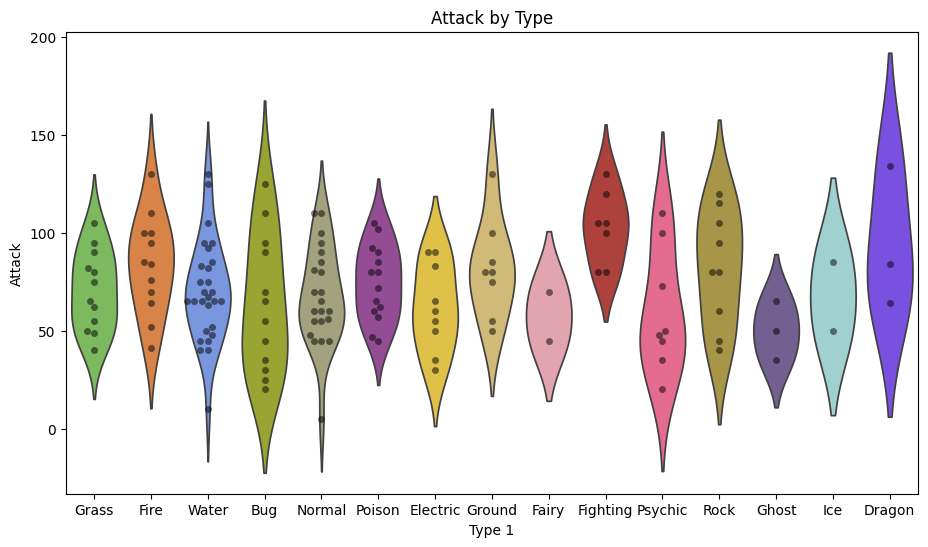

In [38]:
plt.figure(figsize = (11, 6))
x = 'Type 1'
y = 'Attack'
palette = pkmn_color_type
sns.violinplot(
    x = x,
    y = y,
    data = df,
    inner = None,
    hue = x,
    palette = palette
)

sns.swarmplot(
    x = x,
    y = y,
    data = df,
    color = 'black',
    alpha = 0.5 #slightly transparent
)

plt.title('Attack by Type')

#### Graph Breakdown
Now we have a pretty chart that tells us how Attack values are distributed across different Pokemon types. <br>
But what if we wanted to see _all_ of the other stats as well?

We could certainly repeat this chart for each stat but that would be time consuming and hard to show all of the graphs at once. _Instead_ we can combine the information into once chart... We just have to do some **date wranging** in Pandas first.

In [53]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,False


## Putting It All Together
Concluding the Seaborn tutorial by layering all of our information into one plot. As a reminder, above is what our data format currently looks like. <br>
Currently all of our stats are in seperate <ins>columns</ins>. Instead, we want to _"melt"_ them into one column. To do so, we'll use Pandas **melt()** function which takes 3 arguments.
1. The DataFrame to melt
2. ID variables to keep (Pandas will melt all of the other ones)
3. A name for the new melted variable.

In our example we want to keep the **'Name'**, **'Type 1'**, and **'Type 2'**. The rest of the stats move into our new variable **'Stat'**

In [37]:
# Melted DataFrame
melted_df = pd.melt(
    stats_df,
    id_vars= ["Name", "Type 1", "Type 2"],
    var_name= "Stat"
    )
melted_df.head()
    # Comparing the size of each dataframe
#print(stats_df.shape)
#print(melted_df.shape)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


### Understanding the Output
All of the 6 stat columns have been _"melted"_ into one, and the new Stat column indicates the original stat (Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary). Each Pokemon now has 6 rows of data. We can see this by printing the shape of the two dataframes. 

We find that our melted dataframe in 6 times larger than our stats_df (151 vs 906)

### Swarm plot with new DF
Now that we have the melted dataframe, we can create a swarmplot out of the data. <br>
This time:
* we are going to set **x= 'Stat'** and **y= 'value'** so our swarms are seperated by <ins>stat</ins>.
* we will set the **hue= 'Type 1'** to color our points by the pokemon type.

To Make the plot much more readable we will make 5 changes noted in the code:
1. Enlarge the plot.
2. Seperate Points by hue using the argument dodge= True
3. Use our custom Pokemon color palette.
4. Adjust the y-axis to end at 0.
5. Place the legend to the right of the screen.

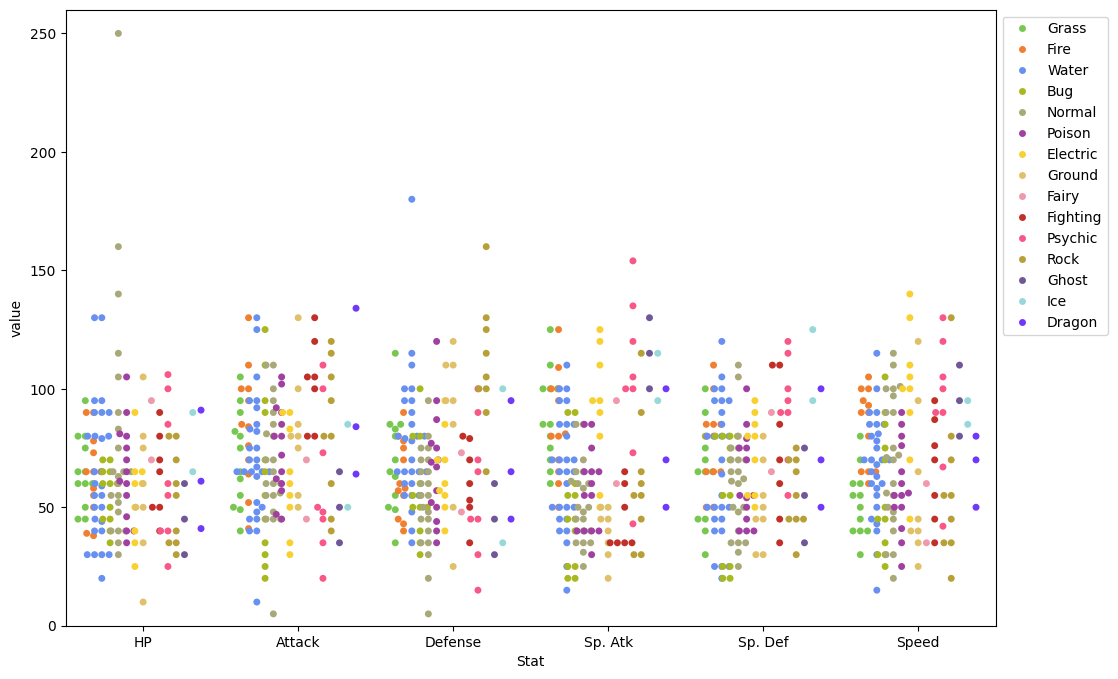

In [11]:
plt.figure(figsize= (12, 8)) #1 Enlarge plot

x = 'Stat'
y = 'value'
hue = 'Type 1'
palette = pkmn_color_type
sns.swarmplot(
    x= x, 
    y= y, 
    data= melted_df, 
    hue= hue,
    dodge= True,        #2 Seperate points by Hue
    palette= palette    #3 Use our Pokemon Palette
    )

#4 Adjust the y-axis
plt.ylim(0, 260)

#5 Place legend to the right
plt.legend(bbox_to_anchor= (1, 1), loc= 2)

# Seaborn Objects System
The new Seaborn Objects system works more like Python's object oriented systems. You call and use the functions that you want to use. <br>
So instead of calling a _scatterplot_ function to create a scatterplot, you call a generalized _plot_ function, and then tell it to add dots to the plot. You're just calling the parts you want into the graph. For a barplot you can use different functions to add bars.

## Syntax of the Seaborn Objects System
Just like in regular Python, Seaborn Objects has a highly structured syntax. The system is highly modular. <br>
Mostly all plots will have the same 3 parts
* The **Plot** function
* The **Add** method
* The function that adds marks to the plot

To be clear, there are other pieces of the Seaborn Objects syntax, like the **facet()**, **scale()**, **theme()**, methods along with many others. 

## The Seaborn "Plot" Function
The **so.Plot()** function is fairly simple. This function initiates plotting for a Seaborn Objects plot. _Technically_ this could be called a function all by itself. <br>
Example, running the following will give us an empty plot.

    so.Plot()



In [ ]:
so.Plot()

### Plot function
Inside of the **plot()** function there are some parameters. Most parameters are optional, but a few are common for most plots.<br>
The most common we will find are 
* <ins>**data** parameter</ins> - Specifies the DataFrame that we want to use for the plot.
* <ins>**x** parameter</ins> - Specify either points or array of points for the **x-axis**
* <ins>**y** parameter</ins> - Specify either points or array of points for the **y-axis**
* <ins>**color** parameter</ins> - Allows us to map a variable to the color of the marks.



## Adding Marks
When we create a Seaborn Objects plot, we need to select the type of mark that we want to draw. For example we can select **Dot Marks**, **Bar Marks**, and **Line Marks** to name a few. <br>
To add a mark we call the **mark()** function inside of the **.add()** method:

    (so.Plot(data= ,x= ,y= )
        .add(so.Dot())
or

    (so.Plot(data= ,x= ,y= )
        .add(so.Line())


In [ ]:
df = pd.read_csv('Pokemon.csv')
flying_df = df[df['Type 2'] == 'Flying']

(so.Plot(
        data= flying_df,
        x= 'Attack',
        y= 'Defense',
        color= 'Type 1'
    )
    .add(
        so.Dot(
            pointsize= 10
            )
        )
)

## Adding Multiple Layers
We can also add _multiple_ layers of marks to our plot. This is where the **Seaborn Objects** system really shows its power and flexibility. <br>
To add multiple layers, we can simply call the **.add()** method multiple times. Inside each seperate call, we can specify what mark we want to plot.

    (so.Plot(data=, x=, y=)
        .add(so.Dot())
        .add(so.Line(), so.Polyfit)
    )

In [ ]:
(so.Plot(
        data= flying_df,
        x= 'Attack',
        y= 'Defense'
    )
    .add(
        so.Line()
        )
    .add(
        so.Dot()
    )
)

In [9]:
all_types = df['Type 1'].unique()

type_df= {}
for pokemon_types in all_types:
    type_df_name = "{}_df".format(pokemon_types.lower())
    type_df[pokemon_types] = df[df['Type 1'] == pokemon_types]
type_df['Grass'].head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,2,False


In [9]:
# Creating DataFrames for each type
grass_df = df[df['Type 1'] == 'Grass']
fire_df = df[df['Type 1'] == 'Fire']
water_df = df[df['Type 1'] == 'Water']
bug_df = df[df['Type 1'] == 'Bug']
poison_df = df[df['Type 1'] == 'Poison']
electric_df = df[df['Type 1'] == 'Electric']
ground_df = df[df['Type 1'] == 'Ground']
fairy_df = df[df['Type 1'] == 'Fairy']
fighting_df = df[df['Type 1'] == 'Fighting']
psychic_df = df[df['Type 1'] == 'Psychic']
rock_df = df[df['Type 1'] == 'Rock']
ghost_df = df[df['Type 1'] == 'Ghost']
ice_df = df[df['Type 1'] == 'Ice']
dragon_df = df[df['Type 1'] == 'Dragon']

In [ ]:
(so.Plot(
    data = highhp_df,
    x= 'HP',
    y= 'Name',
    )
    .facet('Type 1')
    .add(so.Bar(), so.Hist())
)




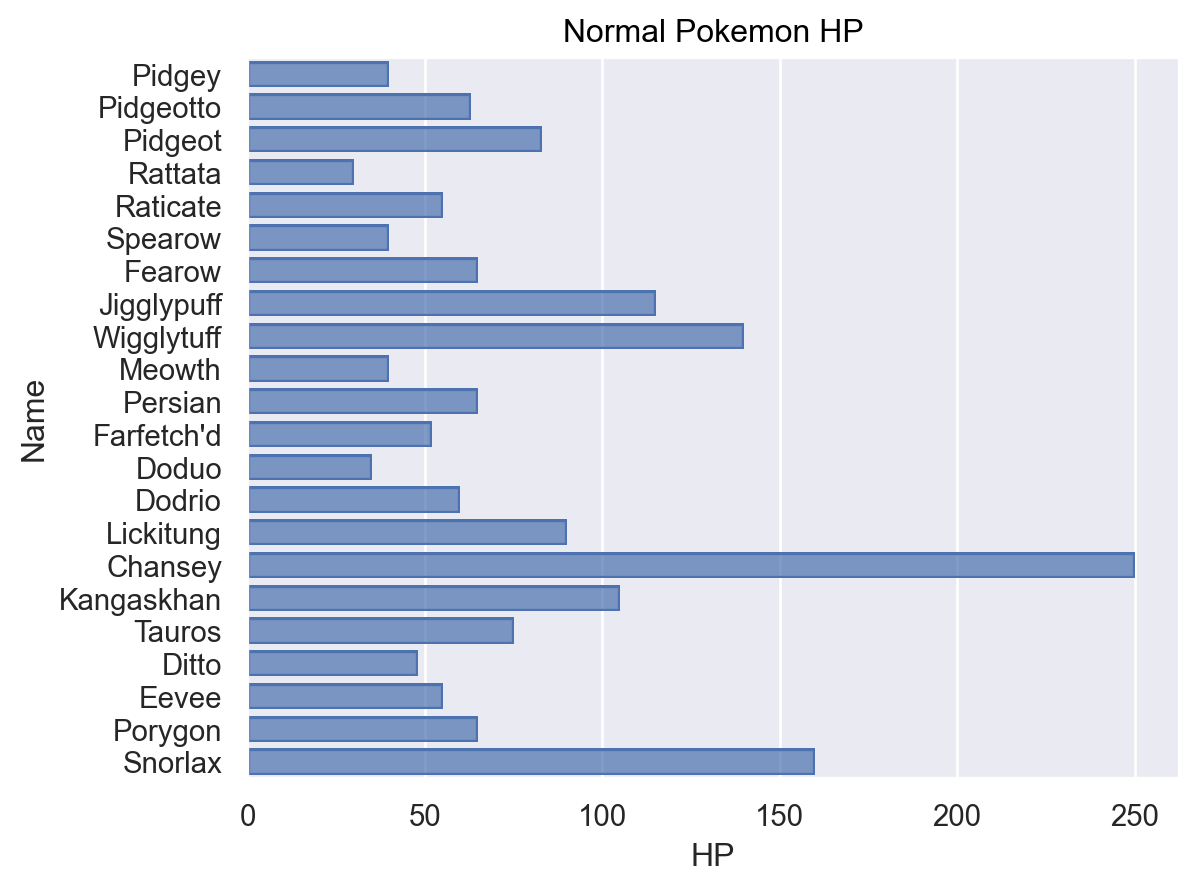

In [4]:
df = pd.read_csv('Pokemon.csv')
normal_df = df[df['Type 1'] == 'Normal']

p = (so.Plot(
    data = normal_df,
    x= 'HP',
    y= 'Name',
    )
    
    .add(so.Bar())
)
p.label(title= "Normal Pokemon HP")


In [ ]:
# Graphs based on Highest value from each type
highhp_df = df.loc[df.groupby('Type 1')['HP'].idxmax()]
highatk_df = df.loc[df.groupby('Type 1')['Attack'].idxmax()]
highdef_df = df.loc[df.groupby('Type 1')['Defense'].idxmax()]
highspatk_df = df.loc[df.groupby('Type 1')['Sp. Atk'].idxmax()]
highspdef_df = df.loc[df.groupby('Type 1')['Sp. Def'].idxmax()]
highspd_df = df.loc[df.groupby('Type 1')['Speed'].idxmax()]
highspd_df.head()
palette = pkmn_color_type

HealthP= sns.barplot(
    x= 'HP',
    y= 'Type 1',
    data= highhp_df,
    hue= 'Type 1',
    palette= palette
)
HealthP.set_title("Highest HP by Type")

plt.show()

Attack= sns.barplot(
    x= 'Attack',
    y= 'Type 1',
    data= highatk_df,
    hue= 'Type 1',
    palette= palette
)
Attack.set_title("Highest Attack by Type")
plt.show()

Defen= sns.barplot(
    x= 'Defense',
    y= 'Type 1',
    data= highdef_df,
    hue= 'Type 1',
    palette= palette
)
Defen.set_title("Highest Defense by Type")
plt.show()

SpAtk= sns.barplot(
    x= 'Sp. Atk',
    y= 'Type 1',
    data= highspatk_df,
    hue= 'Type 1',
    palette= palette
)
SpAtk.set_title("Highest Special Attack by Type")
plt.show()

SpDef= sns.barplot(
    x= 'Sp. Def',
    y= 'Type 1',
    data= highspdef_df,
    hue= 'Type 1',
    palette= palette
)
SpDef.set_title("Highest Special Defense by Type")
plt.show()

Speed= sns.barplot(
    x= 'Speed',
    y= 'Type 1',
    data= highspd_df,
    hue= 'Type 1',
    palette= palette
)
Speed.set_title("Highest Speed by Type")
plt.show()